# Creazione screener evoluto su singolo asset

Architettura di una Morning ed Evening Star senza conferma.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "MAC"
startdate = "2000-01-01"
enddate = "2020-11-10"

In [12]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'MAC:Open,MAC:High,MAC:Low,MAC:Close,MAC:Volume'

In [13]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,macopen,machigh,maclow,macclose,macvolume
Date,,,,,
2000-01-03,18.81,19.15,18.75,18.81,60300.0
2000-01-04,18.86,18.86,18.29,18.46,48000.0
2000-01-05,18.46,19.21,18.29,18.75,44100.0
2000-01-06,18.69,19.44,18.58,19.10,272200.0
2000-01-07,19.21,20.08,19.10,19.85,266700.0
2000-01-10,20.37,20.60,20.37,20.37,76500.0
2000-01-11,20.37,20.72,20.25,20.60,87400.0
2000-01-12,20.60,21.18,20.54,20.89,113500.0
2000-01-13,21.06,21.30,21.01,21.18,142300.0


In [14]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-10-28,6.77,6.88,6.53,6.53,5593100.0
2020-10-29,6.54,6.87,6.42,6.82,3532700.0
2020-10-30,6.79,6.96,6.66,6.96,2962500.0
2020-11-02,7.02,7.16,6.84,7.15,2958000.0
2020-11-03,7.25,7.54,7.20,7.45,4296400.0
2020-11-04,7.36,7.36,6.93,7.23,6258500.0
2020-11-05,7.06,7.40,6.98,7.08,5189600.0
2020-11-06,7.07,7.37,6.89,6.92,4658600.0
2020-11-09,8.31,9.43,8.29,9.02,19573100.0


In [15]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.tail(100).iplot(kind = 'candle', theme = 'white',
                       up_color = 'green', down_color = 'red',
                       title = graph_title, xTitle = "Time", yTitle = "Prices")

In [16]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["body_perc"] = abs(dataset.close - dataset.open) / dataset.open * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,body_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,,
2000-01-31,20.83,20.95,20.60,20.89,54300.0,1.699029,0.288046,65.714286,82.857143,20.6530,1.093792,22.840583,18.465417
2000-02-01,21.01,21.01,20.54,20.60,62900.0,2.288218,1.951452,100.000000,12.765957,20.7425,1.004652,22.751803,18.733197
2000-02-02,19.44,20.14,19.44,19.85,310100.0,3.600823,2.109053,0.000000,58.571429,20.8120,0.878615,22.569230,19.054770
2000-02-03,19.91,20.02,19.85,20.02,197400.0,0.856423,0.552486,35.294118,100.000000,20.8755,0.759574,22.394648,19.356352
2000-02-04,20.20,20.31,19.91,19.96,64900.0,2.009041,1.188119,72.500000,12.500000,20.9185,0.673203,22.264907,19.572093
2000-02-07,20.02,20.20,19.91,19.96,37400.0,1.456554,0.299700,37.931034,17.241379,20.9240,0.664406,22.252813,19.595187
2000-02-08,20.02,20.43,20.02,20.37,49600.0,2.047952,1.748252,0.000000,85.365854,20.9240,0.664406,22.252813,19.595187
2000-02-09,20.54,20.72,20.20,20.54,59200.0,2.574257,0.000000,65.384615,65.384615,20.9210,0.666080,22.253159,19.588841
2000-02-10,20.02,20.25,20.02,20.14,67400.0,1.148851,0.599401,0.000000,52.173913,20.8835,0.688647,22.260794,19.506206


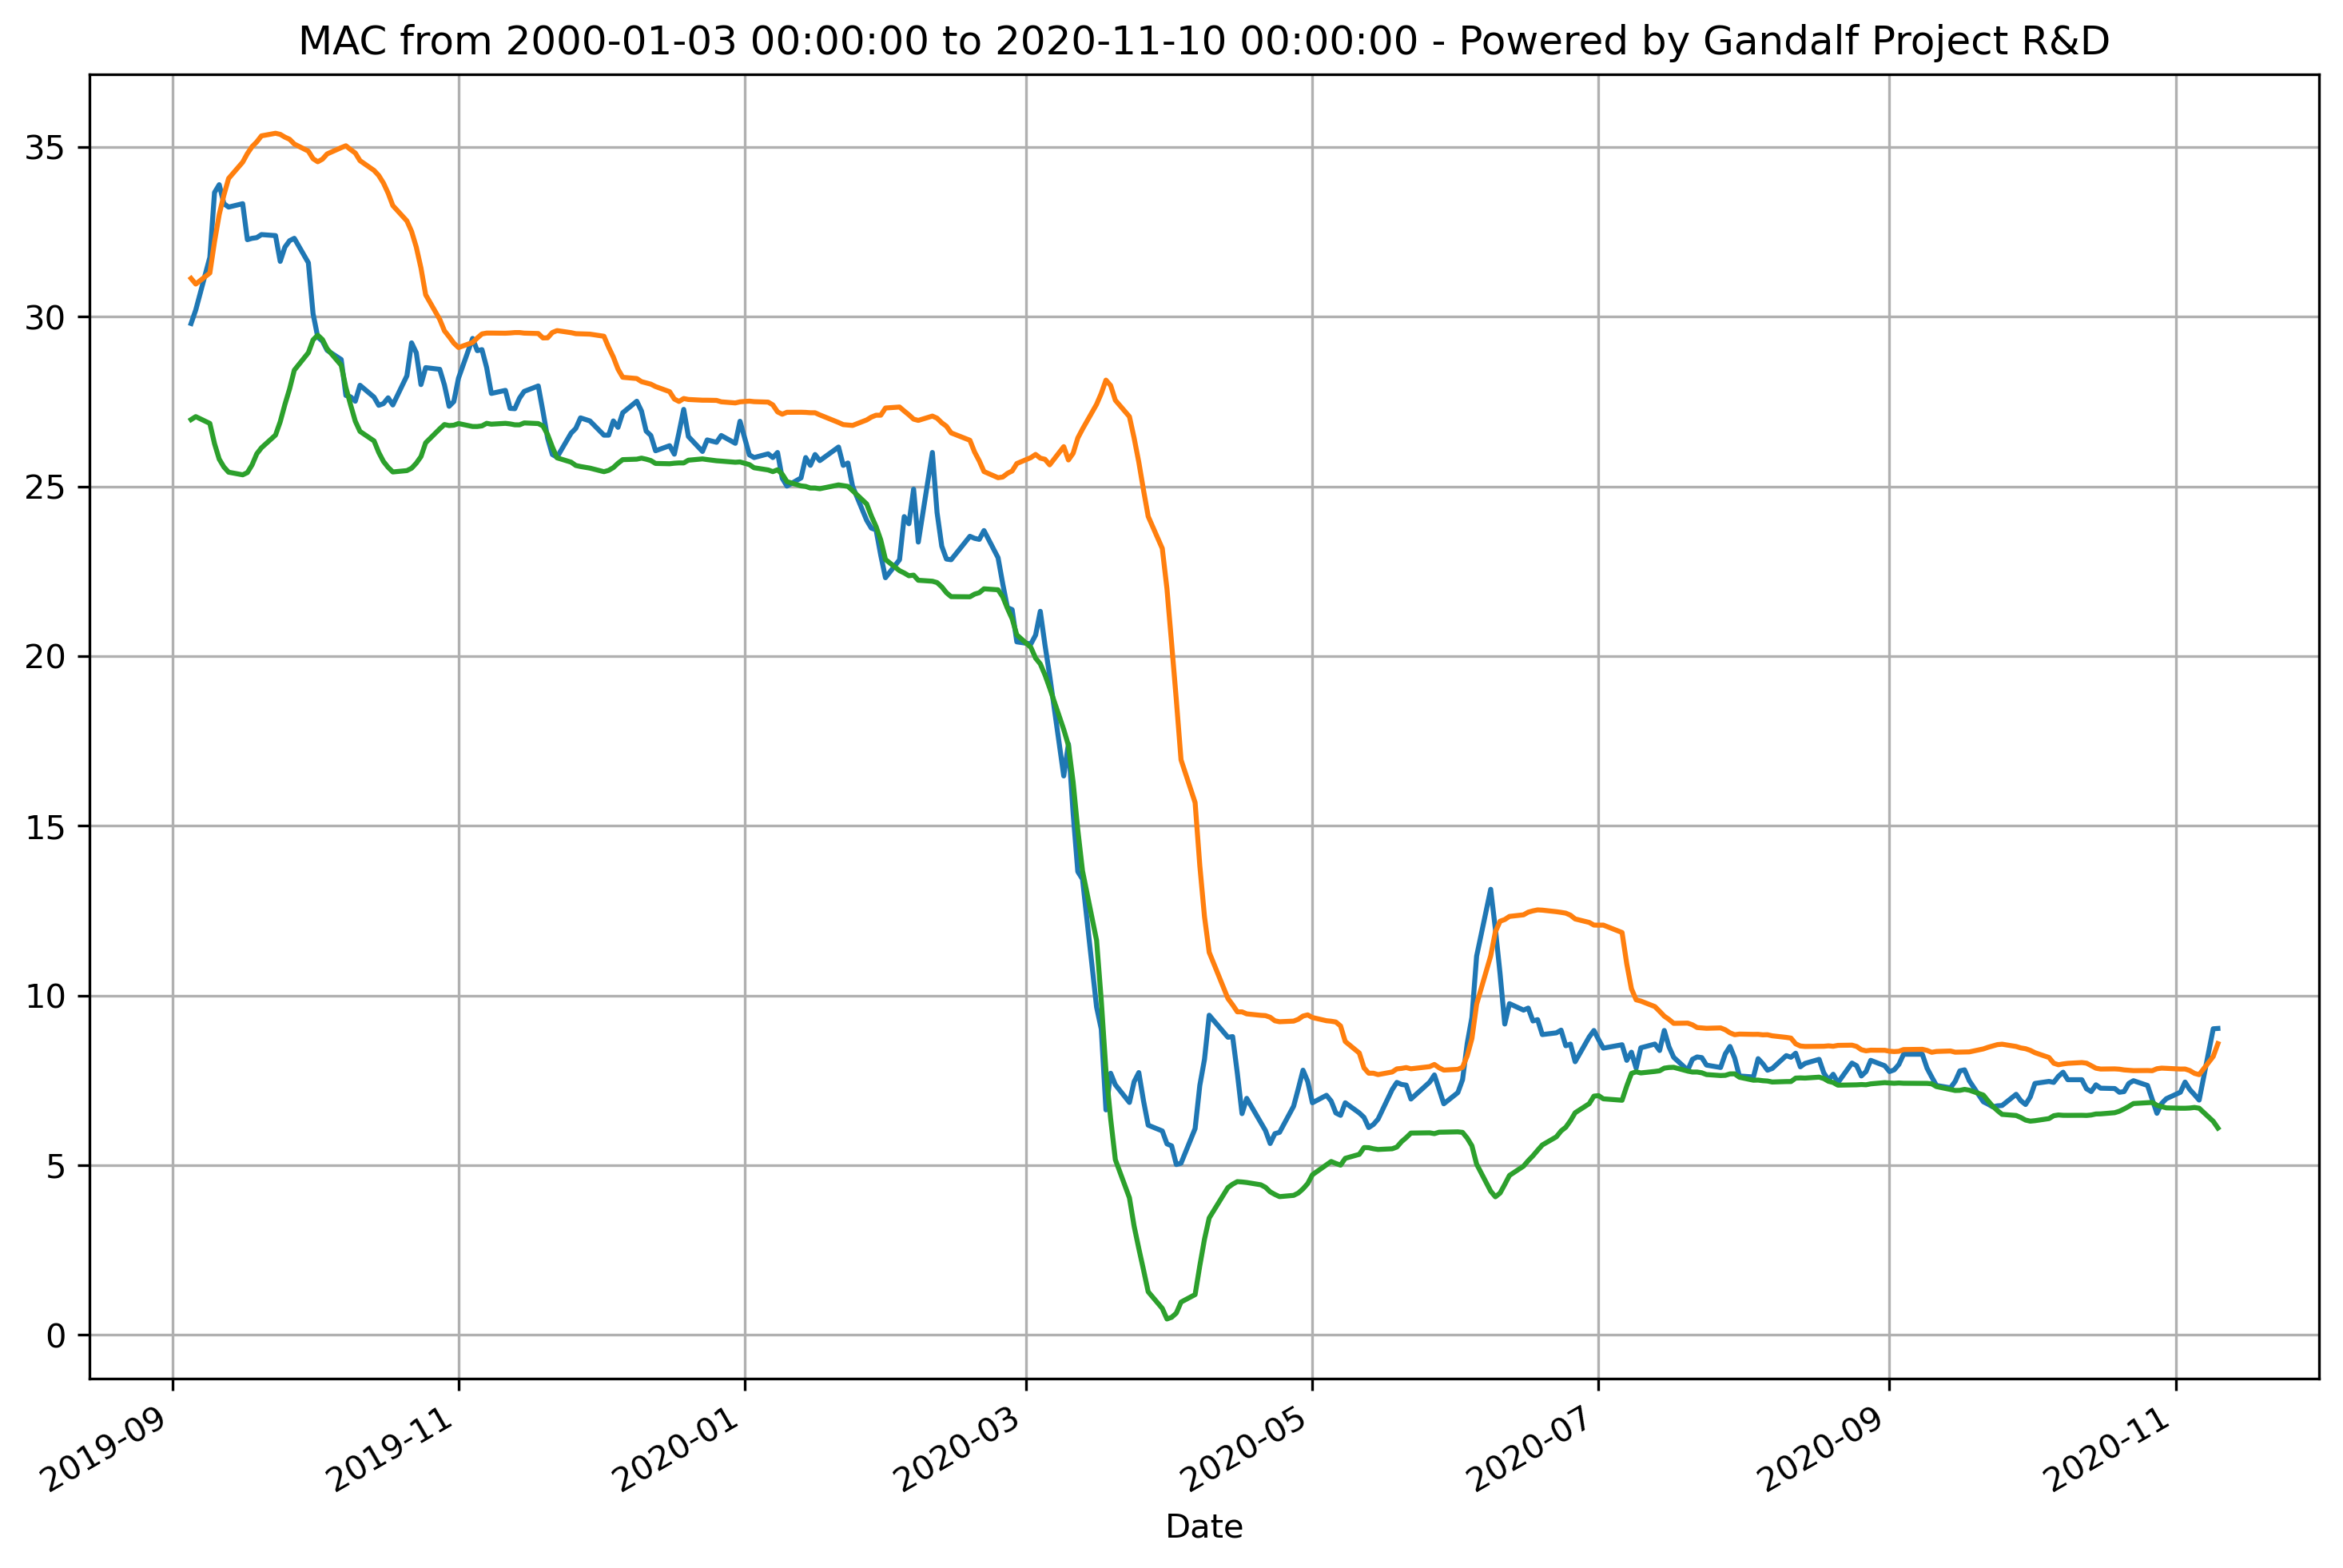

In [17]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close[-300:].plot()
dataset.BBU[-300:].plot()
dataset.BBL[-300:].plot().grid()

# <span style="color:green">Esempio pattern "Morning Star"</span>

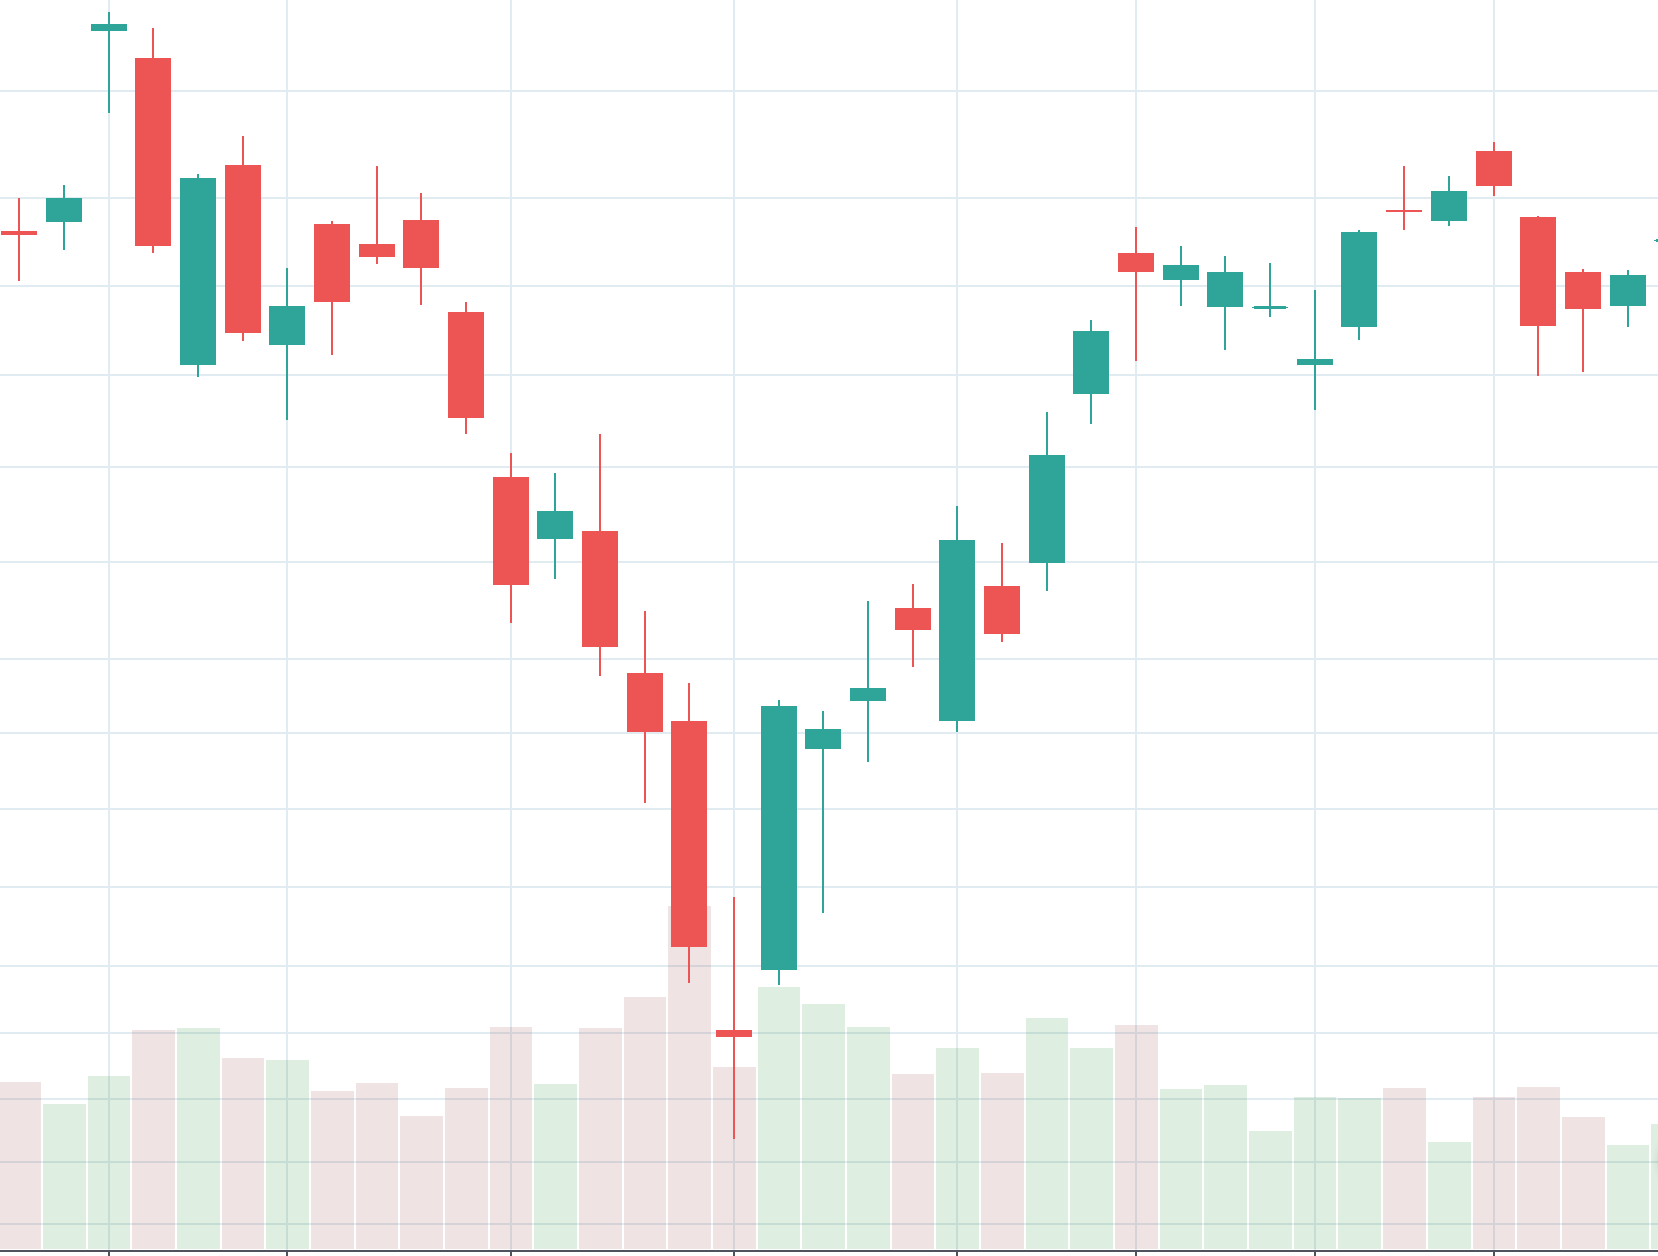

In [19]:
#pattern = ((dataset.low < dataset.BBL) | (dataset.low.shift(1) < dataset.BBL.shift(1)) | (dataset.low.shift(2) < dataset.BBL.shift(2))) & \

pattern = ((dataset.low.shift(1) < dataset.BBL.shift(1))) & \
          (dataset.close > dataset.open) & (dataset.close.shift(2) < dataset.open.shift(2)) & \
          (dataset.close_pos > 70) & (dataset.open_pos < 30) &\
          (dataset.close_pos.shift(2) < 30) & (dataset.open_pos.shift(2) > 70) & \
          (dataset.range_perc > 1) & (dataset.range_perc.shift(2) > 1) & (dataset.body_perc.shift(1) < 1)

Occurrences: 12 

DatetimeIndex(['2003-01-28', '2003-06-25', '2003-08-26', '2005-09-23',
               '2012-11-16', '2014-09-16', '2018-04-27', '2018-09-28',
               '2018-10-08', '2020-01-14', '2020-07-28', '2020-08-04'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: -0.28 average of -0.02 with 6 winning trades and 6 loosing trades
After: 2 days: -1.93 average of -0.16 with 7 winning trades and 5 loosing trades
After: 3 days: -3.52 average of -0.29 with 6 winning trades and 6 loosing trades
After: 4 days: -1.87 average of -0.16 with 7 winning trades and 5 loosing trades
After: 5 days: 0.49 average of 0.04 with 7 winning trades and 5 loosing trades
After: 6 days: 2.66 average of 0.22 with 8 winning trades and 4 loosing trades
After: 7 days: -1.74 average of -0.14 with 4 winning trades and 8 loosing trades
After: 8 days: -4.24 average of -0.35 with 5 winning trades and 7 loosing trades
After: 9 days: -4.92 average of -0.41 with 5 winning trades 

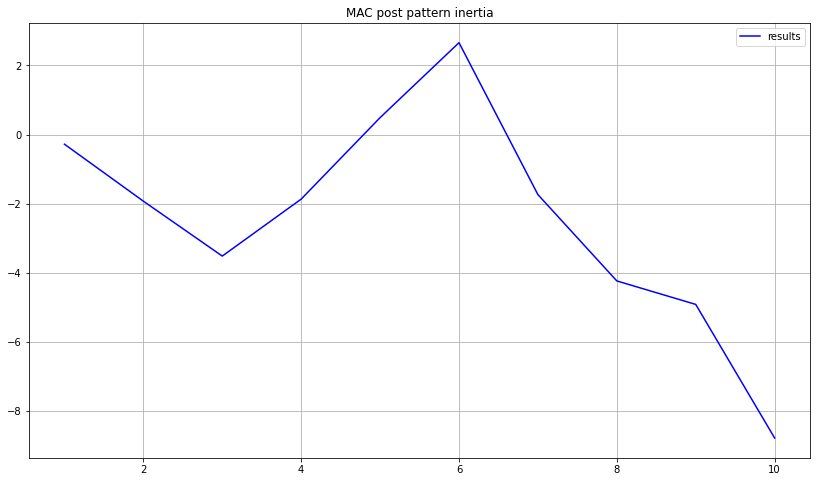

In [20]:
def pattern_stats(dataframe,pattern,direction,delay,ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset, pattern, "long", 10, ticker)

In [21]:
def plot_patterns(dataframe,results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date - pd.Timedelta(days = 5))) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle',theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns(dataset,results[0])

# <span style="color:red">Esempio "Evening Star"</span>

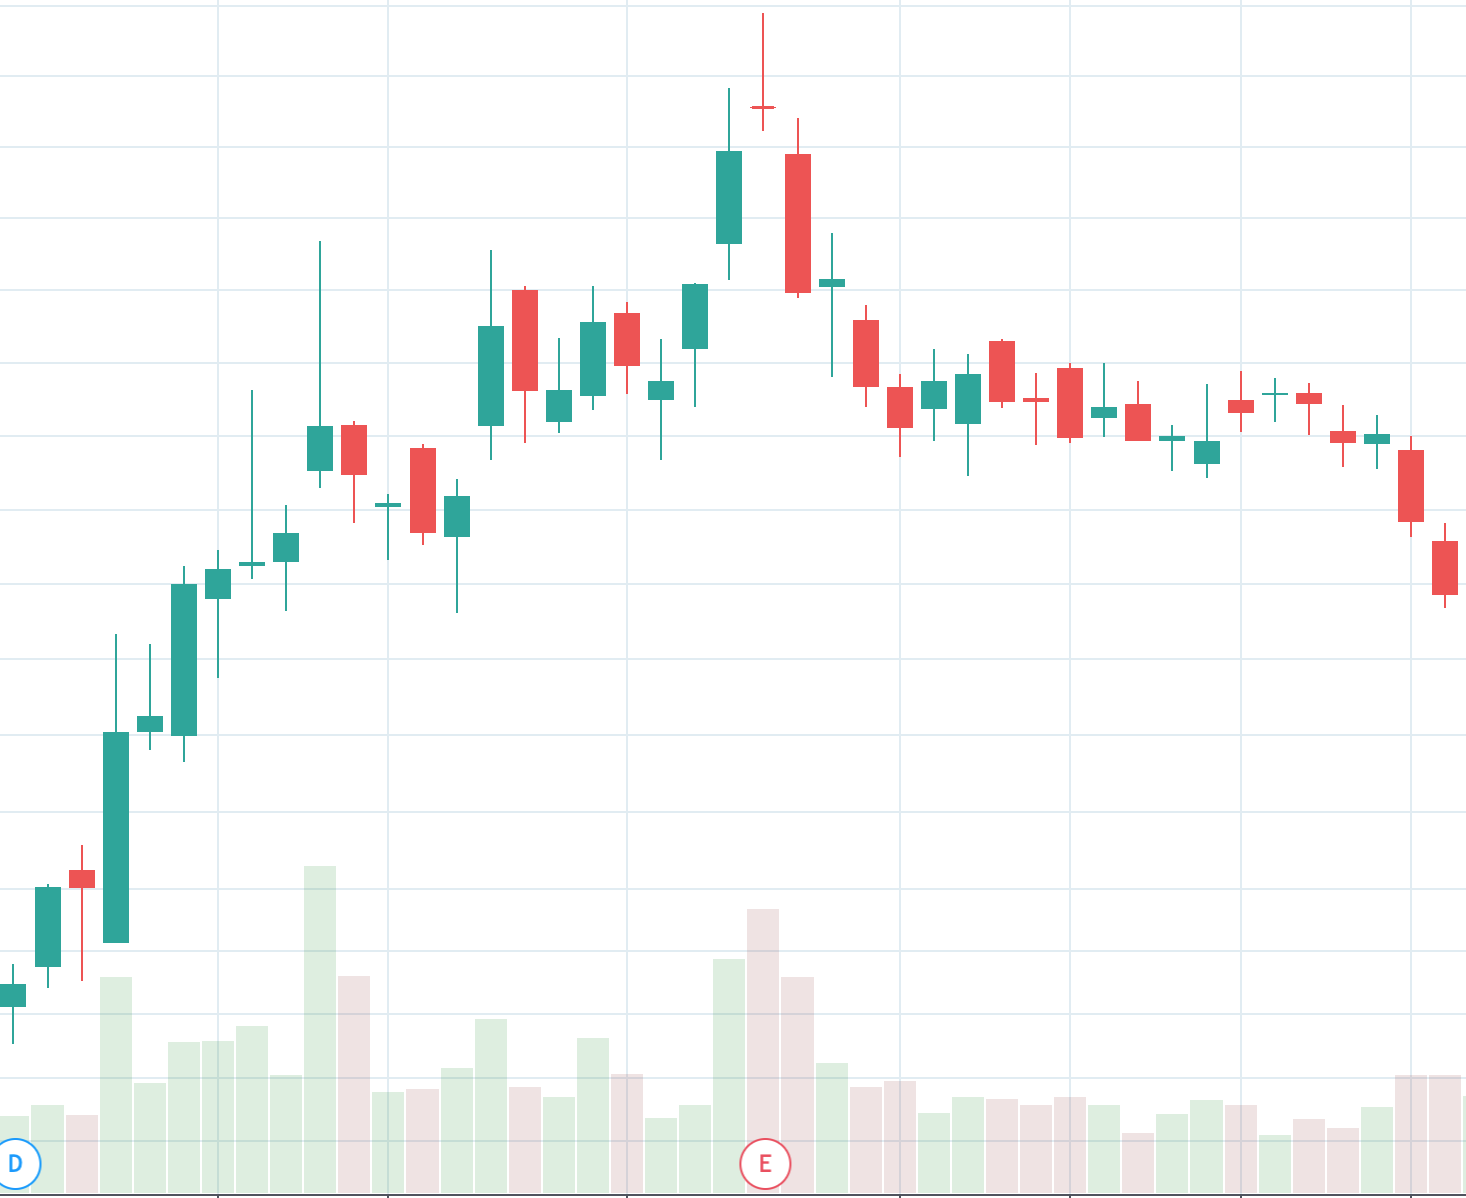

In [25]:
pattern = ((dataset.high.shift(1) > dataset.BBU.shift(1))) & \
          (dataset.close < dataset.open) & (dataset.close.shift(2) > dataset.open.shift(2)) & \
          (dataset.close_pos < 30) & (dataset.open_pos > 70) &\
          (dataset.close_pos.shift(2) > 70) & (dataset.open_pos.shift(2) < 30) & \
          (dataset.range_perc > 1) & (dataset.range_perc.shift(2) > 1) & (dataset.body_perc.shift(1) < 1)

Occurrences: 21 

DatetimeIndex(['2000-07-28', '2000-12-13', '2001-04-03', '2002-01-25',
               '2002-03-08', '2003-06-12', '2003-08-01', '2004-01-02',
               '2004-07-21', '2004-12-16', '2005-08-04', '2006-09-01',
               '2006-09-14', '2007-09-20', '2013-10-21', '2014-06-09',
               '2015-03-11', '2016-12-14', '2017-01-09', '2017-09-18',
               '2019-03-25'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 6.46 average of 0.31 with 11 winning trades and 10 loosing trades
After: 2 days: 7.57 average of 0.36 with 10 winning trades and 11 loosing trades
After: 3 days: 5.75 average of 0.27 with 11 winning trades and 10 loosing trades
After: 4 days: 8.4 average of 0.4 with 11 winning trades and 10 loosing trades
After: 5 days: 7.81 average of 0.37 with 12 winning trades and 9 loosing trades
After: 6 days: 2.13 average of 0.1 with 9 winning trades and 12 loosing trades
After: 7 days: 4.08 average of 0.19 with 9 winning t

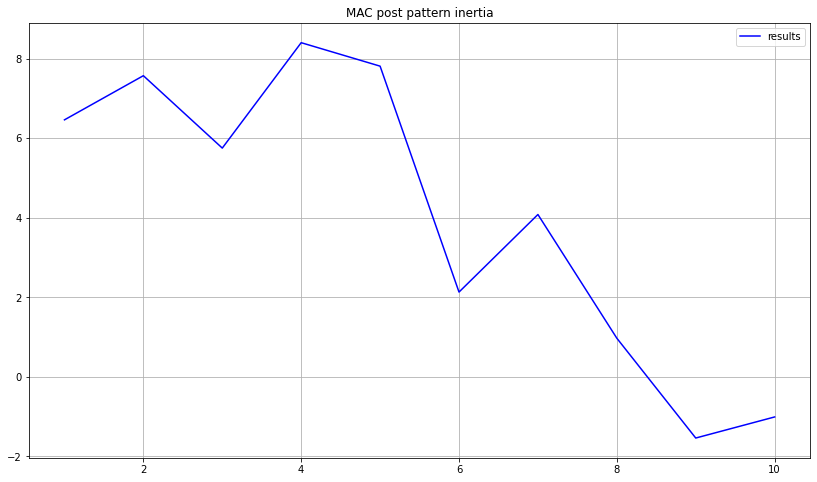

In [27]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [28]:
plot_patterns(dataset,results[0])